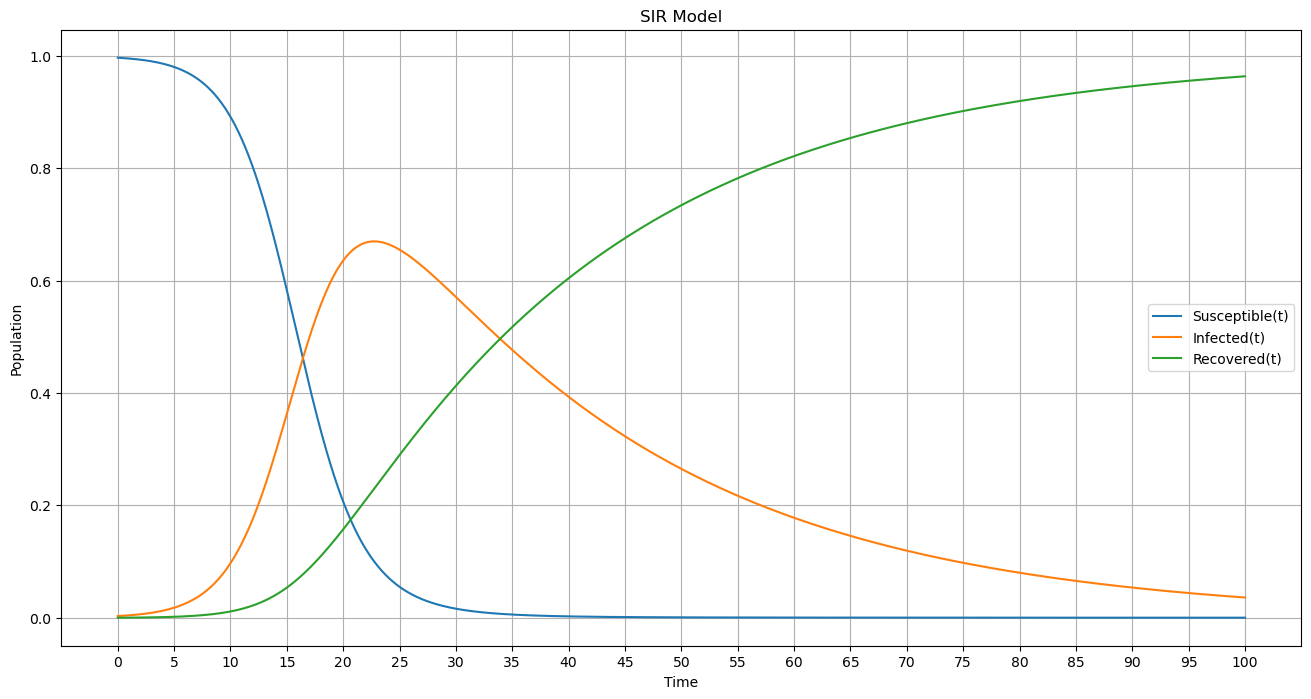

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Параметры модели
beta = 0.4
gamma = 0.04

# Функция, представляющая систему дифференциальных уравнений
def model(y, t):
    s, i, r = y
    dsdt = -beta * s * i
    didt = beta * s * i - gamma * i
    drdt = gamma * i
    return [dsdt, didt, drdt]

# Начальные условия
t0 = 0
t_end = 100
t = np.linspace(t0, t_end, 1000)  # Временные точки для интегрирования

s0 = 0.997  # Начальное значение s(t)
i0 = 0.003  # Начальное значение i(t)
r0 = 0.0  # Начальное значение r(t)

# Решение системы дифференциальных уравнений
y0 = [s0, i0, r0]
sol = odeint(model, y0, t)

# Извлечение решения
s = sol[:, 0]
i = sol[:, 1]
r = sol[:, 2]

# Построение графиков
plt.figure(figsize=(16, 8))
plt.plot(t, s, label='Susceptible(t)')
plt.plot(t, i, label='Infected(t)')
plt.plot(t, r, label='Recovered(t)')
plt.xlabel('Time')
plt.xticks(np.arange(min(t), max(t)+1, 5))
plt.ylabel('Population')
plt.title('SIR Model')
plt.legend()
plt.grid(True)
plt.show()

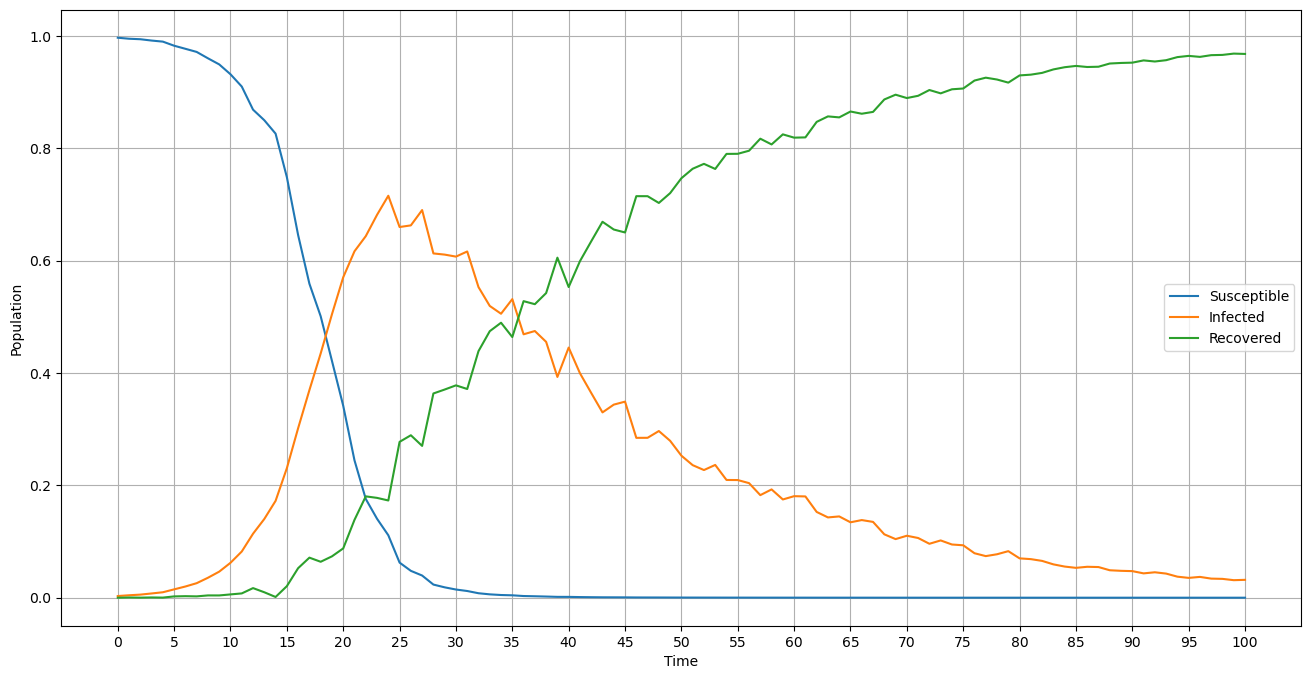

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def euler_maruyama_sir_model(beta, gamma, S0, I0, R0, T, dt, sigma_1, sigma_2):
    # Вычисление количества временных шагов
    N = int(T / dt)

    # Инициализация массивов для хранения значений S, I и R
    S = np.zeros(N+1)
    I = np.zeros(N+1)
    R = np.zeros(N+1)
    W = np.zeros(N+1)
    dW = np.zeros(N+1)

    # Установка начальных значений
    S[0] = S0
    I[0] = I0
    R[0] = R0
    W[0] = np.random.normal(loc=0, scale=np.sqrt(dt))
    dW[0] = W[0]

    # Моделирование SIR-модели с помощью схемы Эйлера-Маруямы
    for j in range(N):
        W[j+1] = np.random.normal(loc=0, scale=np.sqrt(dt))
        dW[j+1] = W[j+1] - W[j]

        S[j+1] = S[j] - beta * S[j] * I[j] * dt - sigma_1 * S[j] * I[j] * dW[j+1]
        I[j+1] = I[j] + (beta * S[j] * I[j] - gamma * I[j]) * dt + sigma_1 * S[j] * I[j] * dW[j+1] - sigma_2 * I[j] * dW[j+1]
        R[j+1] = R[j] + gamma * I[j] * dt + sigma_2 * I[j] * dW[j+1]

    return S, I, R

# Параметры модели
beta = 0.4
gamma = 0.04
S0 = 0.997
I0 = 0.003
R0 = 0
T = 100
dt = 1
sigma_1 = 0.1
sigma_2 = 0.05

# Моделирование SIR-модели
S, I, R = euler_maruyama_sir_model(beta, 
                                   gamma, 
                                   S0, 
                                   I0, 
                                   R0, 
                                   T, 
                                   dt, 
                                  sigma_1,
                                  sigma_2)

# Построение графиков
t = np.arange(0, T+dt, dt)
plt.figure(figsize=(16, 8))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.xticks(np.arange(min(t), max(t)+1, 5))
plt.grid(True)
plt.show()

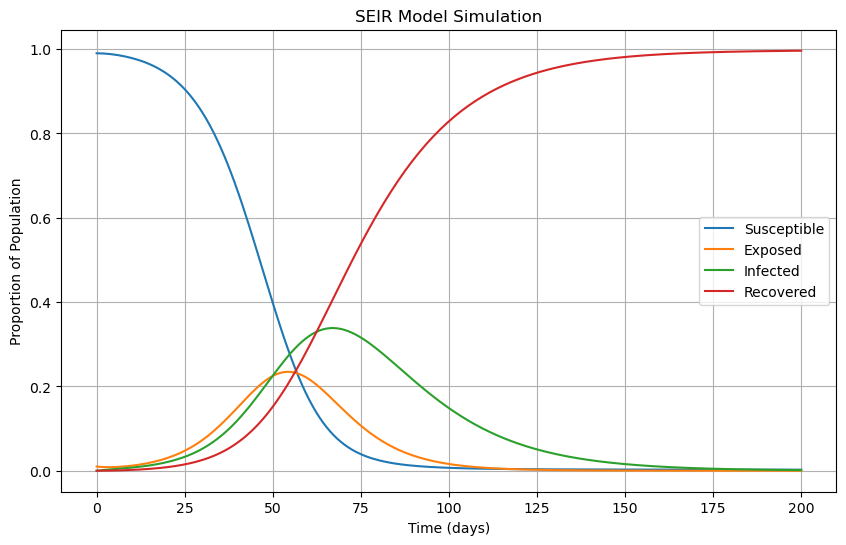

In [55]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

# SEIR model equations 
def SEIR_model(y, t, beta, sigma, gamma): 
    S, E, I, R = y 
    dSdt = -beta * S * I 
    dEdt = beta * S * I - sigma * E 
    dIdt = sigma * E - gamma * I 
    dRdt = gamma * I 
    return [dSdt, dEdt, dIdt, dRdt] 

# Initial conditions 
S0 = 0.99 
E0 = 0.01 
I0 = 0.00 
R0 = 0.00 
y0 = [S0, E0, I0, R0] 

# Parameters 
beta = 0.3 
sigma = 0.1 
gamma = 0.05 

# Time vector 
t = np.linspace(0, 200, 200) 

# Solve the SEIR model equations 
solution = odeint(SEIR_model, y0, t, args=(beta, sigma, gamma)) 
# Extract results 
S, E, I, R = solution.T 
# Plot the results 
plt.figure(figsize=(10, 6)) 
plt.plot(t, S, label='Susceptible') 
plt.plot(t, E, label='Exposed') 
plt.plot(t, I, label='Infected') 
plt.plot(t, R, label='Recovered') 
plt.xlabel('Time (days)') 
plt.ylabel('Proportion of Population') 
plt.title('SEIR Model Simulation') 
plt.legend() 
plt.grid(True) 
plt.show()